In [47]:
import os

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [49]:
data = pd.read_csv(r'C:\Users\Robin Aluma\Desktop\fever_medicines\medication_data\enhanced_fever_medicine_recommendation.csv')
data.head()

,Temperature,Fever_Severity,Age,Gender,BMI,Headache,Body_Ache,Fatigue,Chronic_Conditions,Allergies,Smoking_History,Alcohol_Consumption,Humidity,AQI,Physical_Activity,Diet_Type,Heart_Rate,Blood_Pressure,Previous_Medication,Recommended_Medication
0,36.1,Normal,89,Female,24.0,No,Yes,No,No,Yes,No,Yes,81.4,430,Moderate,Vegan,72,Normal,NaN,Ibuprofen
1,37.5,Mild Fever,94,Male,26.6,No,No,No,Yes,No,Yes,Yes,44.4,10,Active,Vegetarian,62,High,Ibuprofen,Paracetamol
2,36.4,Normal,92,Male,27.8,No,No,No,No,No,No,Yes,73.7,400,Sedentary,Vegan,85,High,NaN,Ibuprofen
3,39.8,High Fever,66,Male,18.7,No,Yes,No,No,No,No,No,44.1,438,Active,Non-Vegetarian,96,High,Ibuprofen,Ibuprofen
4,39.3,High Fever,28,Male,21.0,No,Yes,No,Yes,Yes,Yes,Yes,65.9,451,Active,Vegetarian,85,Low,Paracetamol,Ibuprofen


In [50]:
data.shape

(1000, 20)

In [51]:
data.describe()

,Temperature,Age,BMI,Humidity,AQI,Heart_Rate
count,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,38.09890,51.152000,26.44320,60.594400,248.493000,80.14400
std,1.13887,28.873354,4.90115,17.058475,143.705244,11.79196
min,36.00000,1.000000,18.00000,30.000000,0.000000,60.00000
25%,37.20000,26.000000,22.40000,46.600000,127.750000,70.00000
50%,38.20000,51.000000,26.50000,60.950000,247.500000,80.00000
75%,39.10000,76.000000,30.52500,74.725000,375.250000,90.00000
max,40.00000,100.000000,35.00000,90.000000,499.000000,100.00000


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             1000 non-null   float64
 1   Fever_Severity          1000 non-null   object 
 2   Age                     1000 non-null   int64  
 3   Gender                  1000 non-null   object 
 4   BMI                     1000 non-null   float64
 5   Headache                1000 non-null   object 
 6   Body_Ache               1000 non-null   object 
 7   Fatigue                 1000 non-null   object 
 8   Chronic_Conditions      1000 non-null   object 
 9   Allergies               1000 non-null   object 
 10  Smoking_History         1000 non-null   object 
 11  Alcohol_Consumption     1000 non-null   object 
 12  Humidity                1000 non-null   float64
 13  AQI                     1000 non-null   int64  
 14  Physical_Activity       1000 non-null   o

In [53]:
# Code to check outliers in the dataframe
def find_outliers_percentile(data, lower_percentile=0.01, upper_percentile=0.99):
    """
    Identify outliers using percentile method.
    Returns a DataFrame with True for outlier values.
    """
    outliers = pd.DataFrame()
    for column in data.select_dtypes(include=[np.number]).columns:
        lower_bound = data[column].quantile(lower_percentile)
        upper_bound = data[column].quantile(upper_percentile)
        
        outliers[column] = (data[column] < lower_bound) | (data[column] > upper_bound)
    
    return outliers


In [54]:
find_outliers_percentile(data=data)

,Temperature,Age,BMI,Humidity,AQI,Heart_Rate
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
995,False,False,False,False,False,False
996,False,False,False,False,False,False
997,False,False,False,False,False,False
998,False,False,False,False,False,False


In [55]:
def plot_boxplots(data):
    """
    Create boxplots for each numerical column to visualize outliers.
    """
    num_cols = data.select_dtypes(include=[np.number]).columns
    n_cols = len(num_cols)
    
    plt.figure(figsize=(15, n_cols * 3))
    for i, col in enumerate(num_cols):
        plt.subplot(n_cols, 1, i+1)
        sns.boxplot(x=data[col])
        plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()


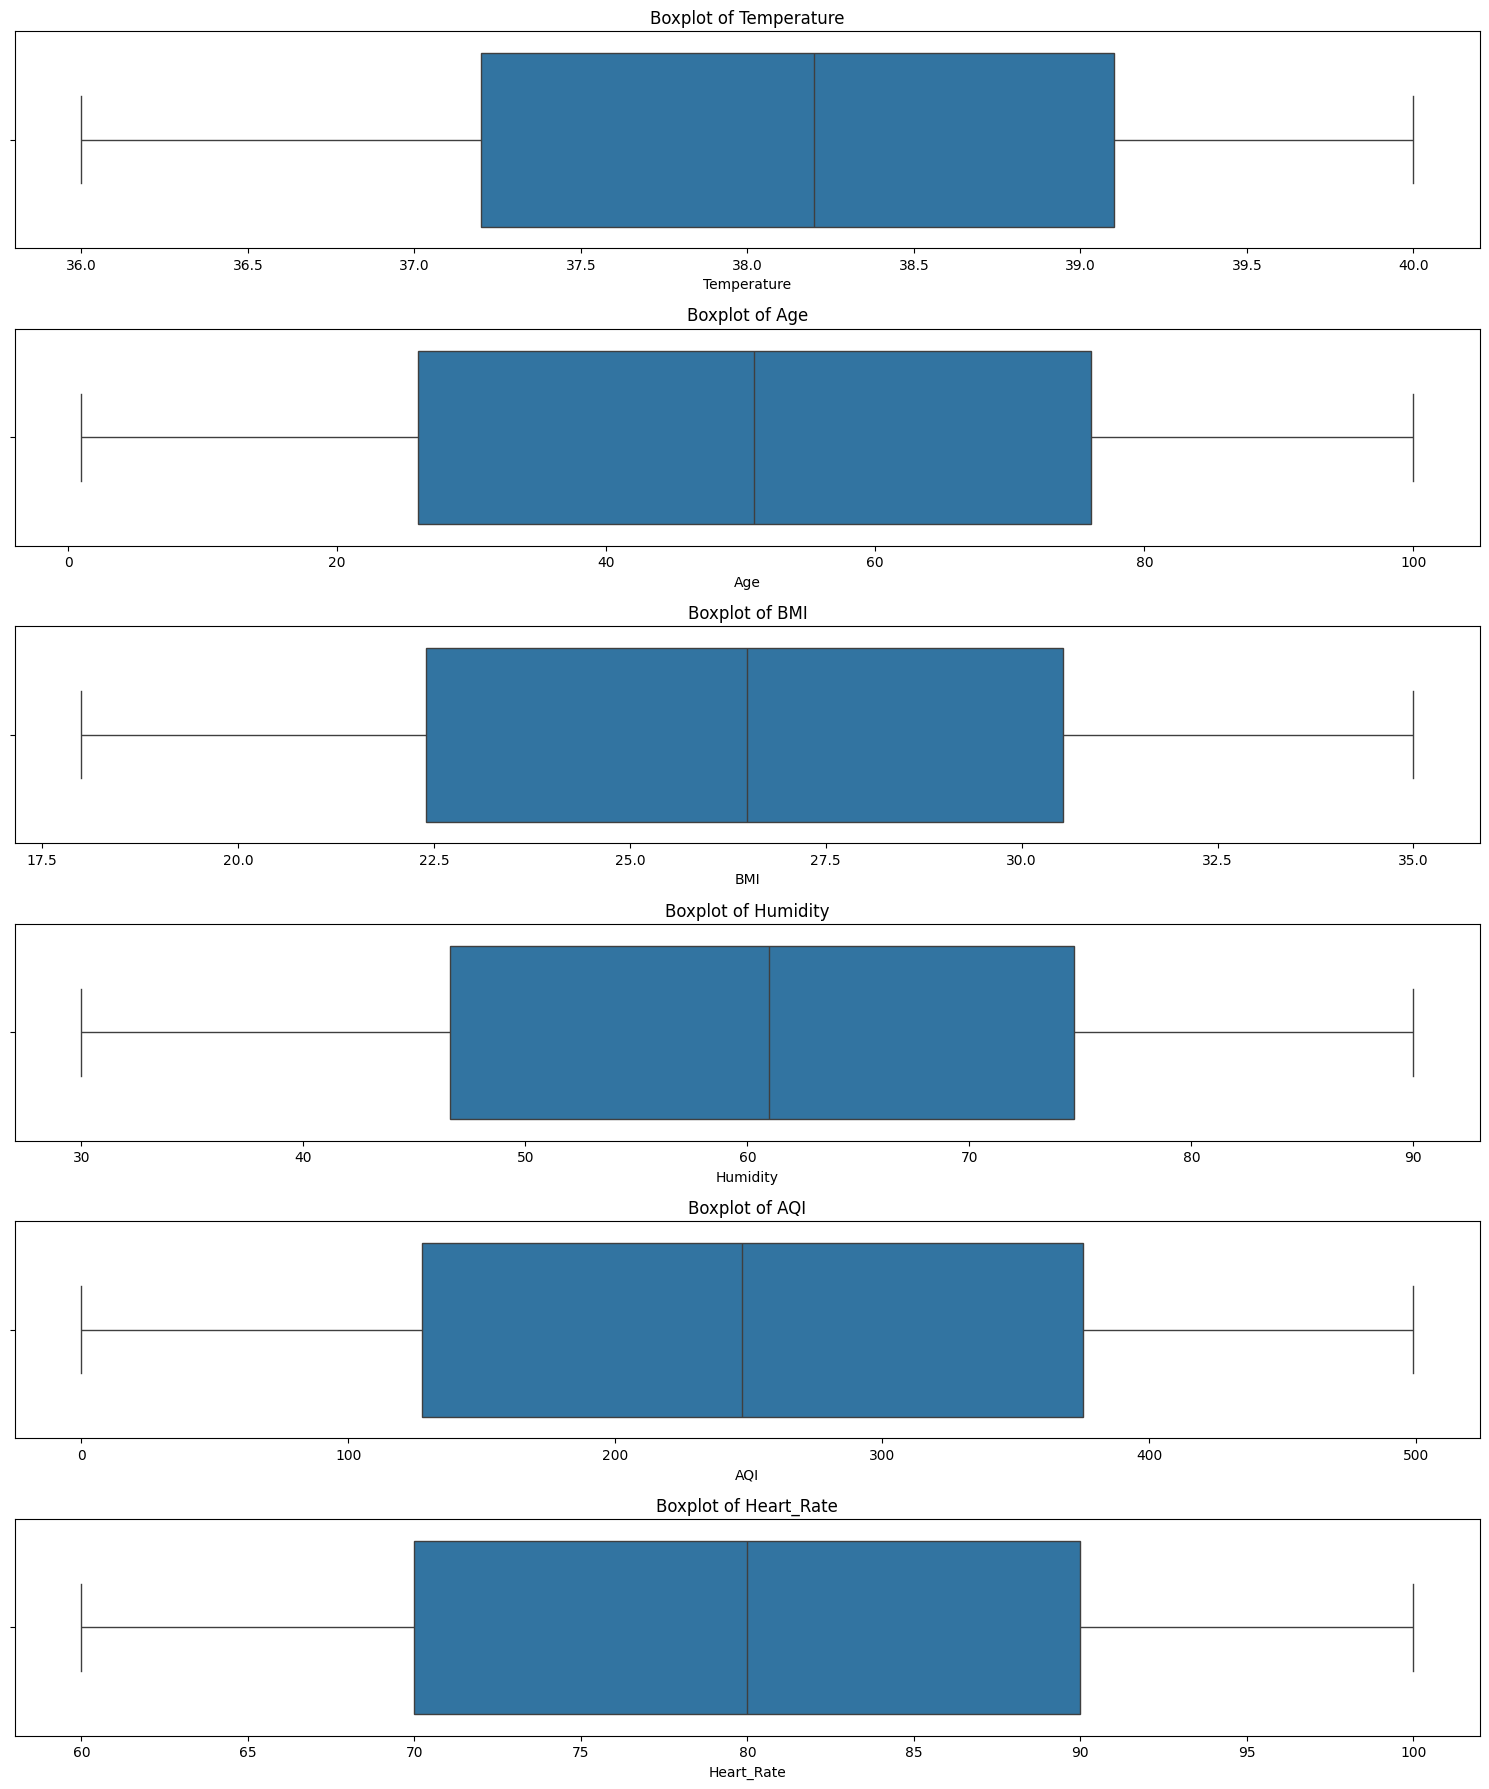

In [56]:
plot_boxplots(data)

**None of the columns in the dataframe has outliers.**

In [57]:
# Function to compute and visualize correlation matrix
def analyze_correlations(data, method='pearson', threshold=0.7, figsize=(12, 10)):
    
    # Select only numeric columns
    numeric_df = data.select_dtypes(include=[np.number])
    
    # Calculate correlation matrix
    corr_matrix = numeric_df.corr(method=method)
    
    # Visualize the correlation matrix as a heatmap
    plt.figure(figsize=figsize)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Create mask for upper triangle
    
    # Create heatmap
    sns.heatmap(
        corr_matrix, 
        annot=True,  # Show correlation values
        mask=mask,   # Only show lower triangle
        cmap='coolwarm',  # Color map
        vmin=-1, vmax=1,  # Value range
        fmt='.2f',  # Format of annotation (2 decimal places)
        linewidths=0.5,  # Width of lines between cells
        cbar_kws={"shrink": 0.8}  # Colorbar settings
    )
    plt.title(f'Correlation Matrix ({method.capitalize()} Method)', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # Find and print highly correlated pairs
    print(f"\nStrongly correlated features (|correlation| > {threshold}):")
    
    # Get pairs of features with correlation above threshold (absolute value)
    strong_correlations = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                strong_correlations.append(
                    (corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
                )
    
    # Sort by absolute correlation value (descending)
    strong_correlations.sort(key=lambda x: abs(x[2]), reverse=True)
    
    # Print results
    if strong_correlations:
        for feat1, feat2, corr in strong_correlations:
            print(f"{feat1} — {feat2}: {corr:.3f}")
    else:
        print(f"No feature pairs with correlation above {threshold} found.")
    
    # Create pairplot for highly correlated features
    if strong_correlations:
        # Get unique features from strong correlations
        high_corr_features = set()
        for feat1, feat2, _ in strong_correlations:
            high_corr_features.add(feat1)
            high_corr_features.add(feat2)
        
        # Limit to top 5 features if there are too many
        if len(high_corr_features) > 5:
            print("\nShowing pairplot for top 5 most correlated features...")
            top_features = set()
            for feat1, feat2, _ in strong_correlations[:5]:
                top_features.add(feat1)
                top_features.add(feat2)
            high_corr_features = list(top_features)[:5]
        
        # Create pairplot
        print("\nCreating pairplot for highly correlated features...")
        sns.pairplot(data[high_corr_features])
        plt.suptitle('Pairplot of Highly Correlated Features', y=1.02)
        plt.show()
    
    return corr_matrix



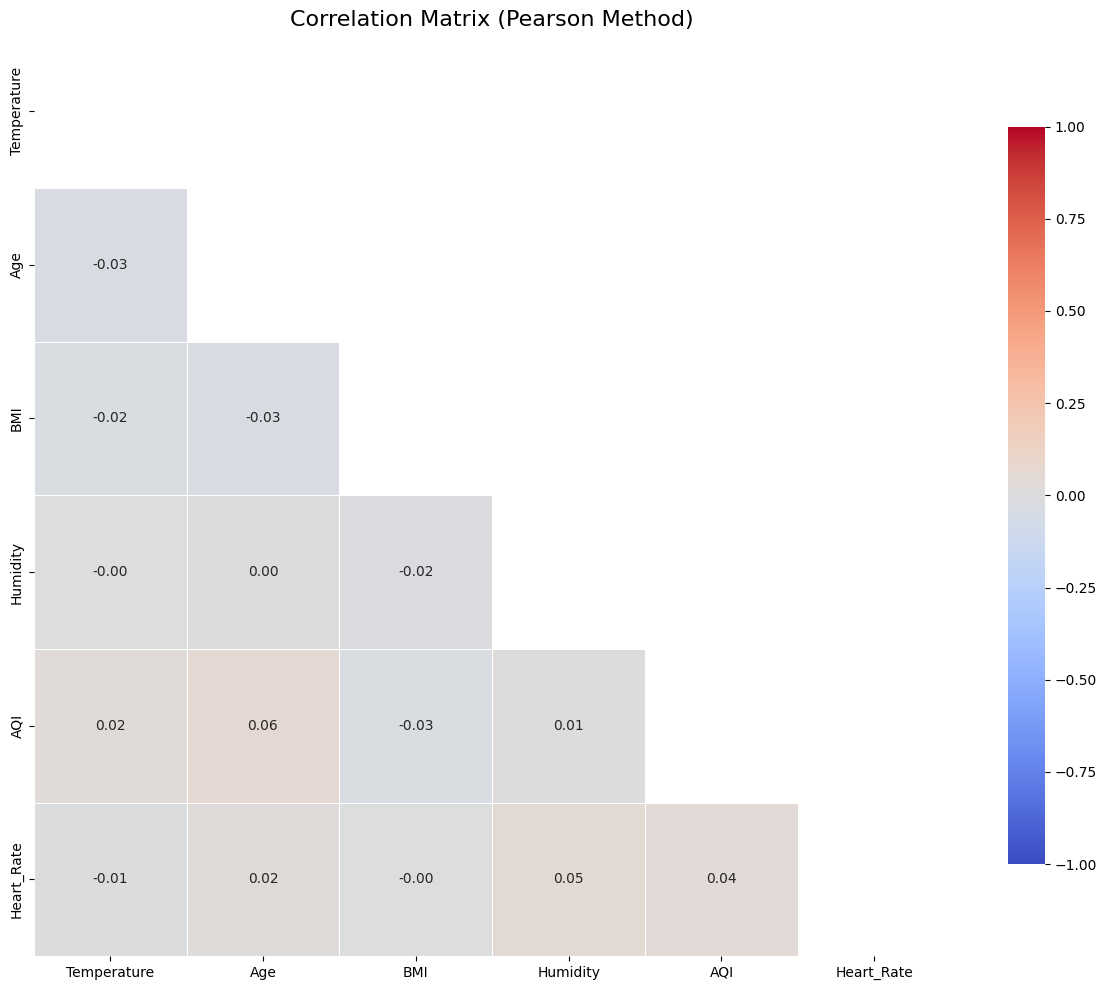


Strongly correlated features (|correlation| > 0.7):
No feature pairs with correlation above 0.7 found.


,Temperature,Age,BMI,Humidity,AQI,Heart_Rate
Temperature,1.000000,-0.034607,-0.024888,-0.004297,0.023651,-0.011318
Age,-0.034607,1.000000,-0.034103,0.001818,0.059965,0.018755
BMI,-0.024888,-0.034103,1.000000,-0.020887,-0.030511,-0.003137
Humidity,-0.004297,0.001818,-0.020887,1.000000,0.009569,0.048946
AQI,0.023651,0.059965,-0.030511,0.009569,1.000000,0.035997
Heart_Rate,-0.011318,0.018755,-0.003137,0.048946,0.035997,1.000000


In [58]:
analyze_correlations(data=data)

**No featues highly correlated.Hence all features are important in the prediction modelling.**